Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


images\chelsea.png
images\coca.jpg
images\etienne.jpg
images\etienneo.PNG
images\love.jpg


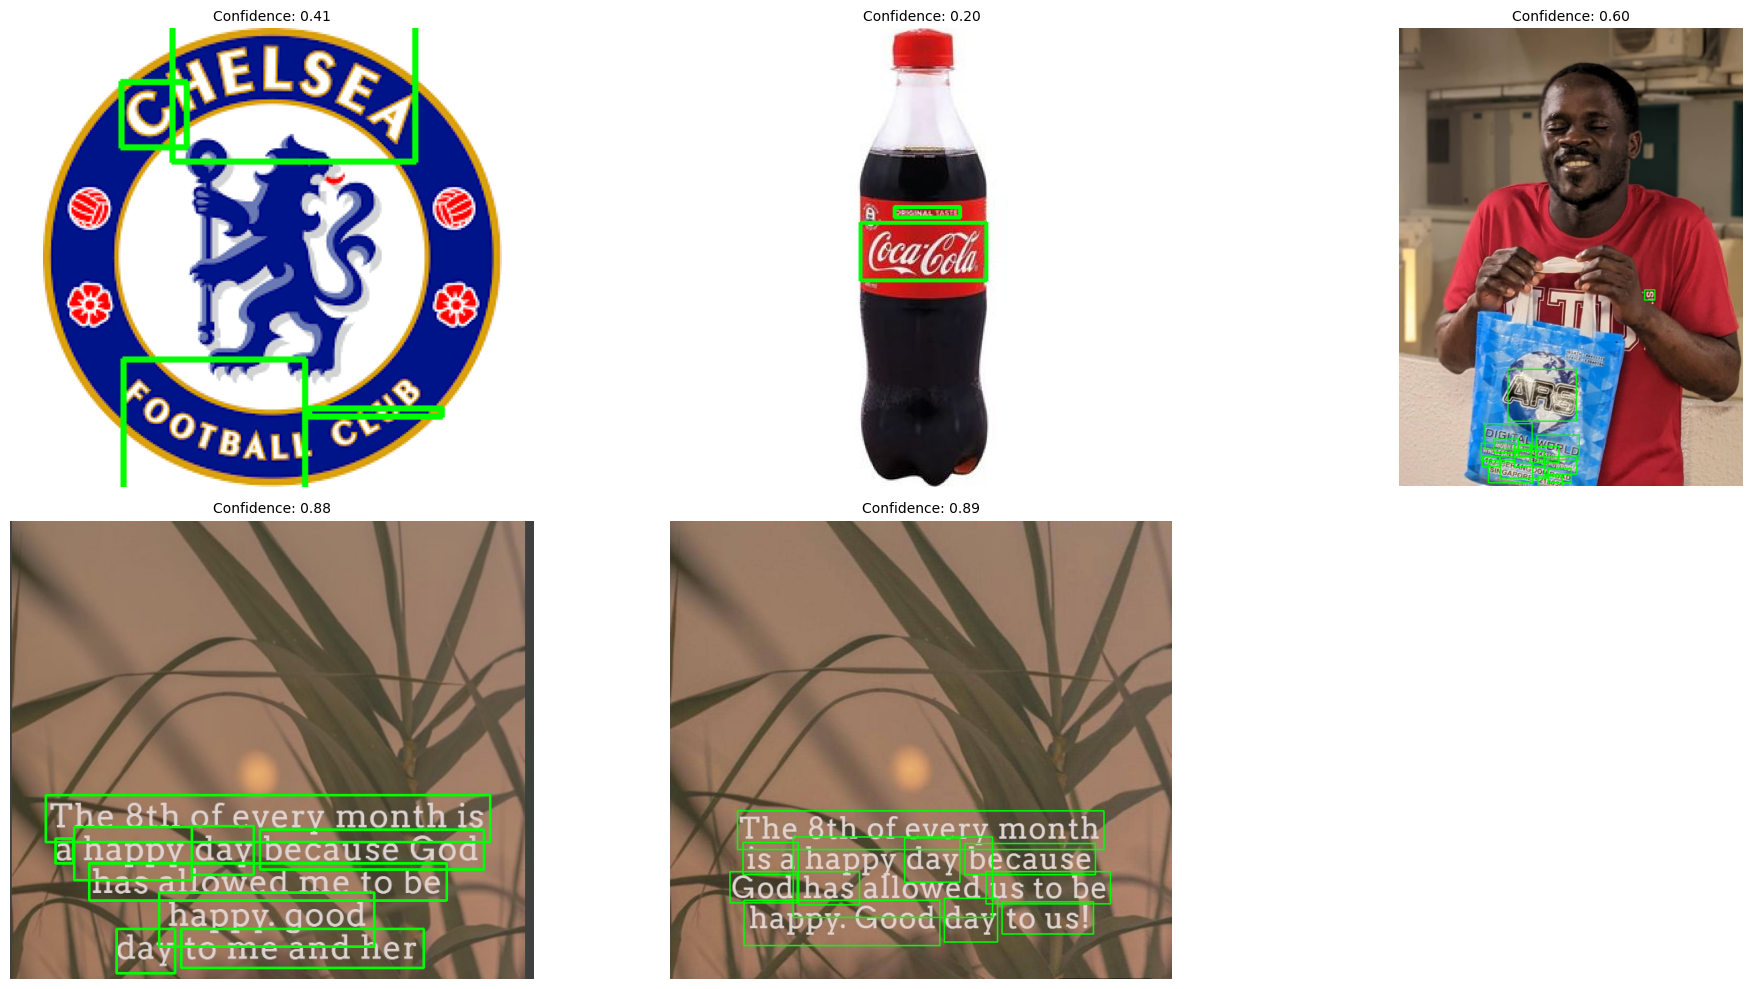

                 image                                      detected_text  \
0   images\chelsea.png                             6 HELSEZ FootbaLL CLUB   
1      images\coca.jpg                             Gonsimat Iastt GcaGcla   
2   images\etienne.jpg  W d 182, Ars DIGITAL WORLD Mobiles WHOLESALEIC...   
3  images\etienneo.PNG  The 8th of every month is a 'happy because God...   
4      images\love.jpg  The 8th of every month is a because God hapali...   

   confidence  
0    0.409459  
1    0.195569  
2    0.595874  
3    0.883145  
4    0.887099  


In [1]:
import cv2
import glob
import pandas as pd
import easyocr
from matplotlib import pyplot as plt

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])  # English

# Select the path
path = "images/*.*"
files = glob.glob(path)

# Define the number of columns for subplot
columns = 3
rows = len(files) // columns + (len(files) % columns > 0)

# Set the figure size
plt.figure(figsize=(20, rows * 5))  # Adjust the size as needed

# Process each file and store results in a list
results_list = []

for index, file in enumerate(files):
    print(file)  # Print file name
    img = cv2.imread(file)  # Read image in color
    img_to_draw = img.copy()  # Make a copy for drawing rectangles
    results = reader.readtext(img, detail=1, paragraph=False)  # OCR
    
    # Initialize an empty string to hold concatenated text and a list for confidences
    detected_text = ''
    confidences = []
    
    # Check if results is not empty and extract text and confidence
    if results:
        for (bbox, text, prob) in results:
            detected_text += text + " "
            confidences.append(prob)
            
            # Draw bounding boxes on the copy of the image
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            cv2.rectangle(img_to_draw, top_left, bottom_right, (0, 255, 0), 2)

        # Calculate average confidence if there are any confidences
        average_confidence = sum(confidences) / len(confidences) if confidences else 0
    else:
        average_confidence = 0  # No text found, so confidence is 0

    # Append results to the list
    results_list.append({
        'image': file,
        'detected_text': detected_text.strip(),  # Strip the trailing space
        'confidence': average_confidence
    })
    
    # Convert to RGB for plotting
    img_rgb = cv2.cvtColor(img_to_draw, cv2.COLOR_BGR2RGB)
    
    # Add subplot for each image
    plt.subplot(rows, columns, index + 1)
    plt.imshow(img_rgb)
    plt.title(f'Confidence: {average_confidence:.2f}', fontsize=10)
    plt.axis('off')  # Hide the axis

# Adjust layout
plt.tight_layout()
plt.show()

# Create a DataFrame from the list
df = pd.DataFrame(results_list)

# Output the DataFrame
print(df)
